In [73]:
# The code was removed by Watson Studio for sharing.

In [74]:
PARIS_COORDINATES = [48.866667, 2.333333]
RESTAURANT_CATEGORY = 'seafood' #no space or special character
FOURSQUARE_CATEGORY = '4bf58dd8d48988d1ce941735' #category for seafood restaurants, see https://developer.foursquare.com/docs/build-with-foursquare/categories/
FOURSQUARE_RADIUS = 1500 #Radius that should allow to cover every neighborhood
FOURSQUARE_LIMIT = 100
FOURSQUARE_UPDATE = False #Do we search the data in Foursquare or do we use the local data? This field is useful to avoid reaching the maximum queries per day

In [75]:
# The code was removed by Watson Studio for sharing.

## Get data about Paris neighborhoods

Le quartier désigne la division administrative de l’arrondissement. Chaque arrondissement est découpé
en quatre quartiers administratifs. Paris compte ainsi quatre-vingt quartiers administratifs.

https://en.wikipedia.org/wiki/Demographics_of_Paris#/media/File:Paris_Historical_Population.png

Faire une carte avec isprimarycategory

ATTENTION AU COPIE DE DF VS NOUVEAU DF => REVOIR COURSERA

VOIR SI ON PEUT FAIRE DES REGRESSIONS

### Import libraries

In [76]:
import pandas as pd
print('pandas library imported.')
import numpy as np
print('numpy library imported.')
import requests
print('requests library imported.')
from bs4 import BeautifulSoup
print('BeautifulSoup library imported.')
import json
print('json imported.')

print('All libraries imported.')

pandas library imported.
numpy library imported.
requests library imported.
BeautifulSoup library imported.
json imported.
All libraries imported.


### Get the data about neighborhoods of Paris

Get a csv from the site of the City of Paris: https://opendata.paris.fr/explore/dataset/quartier_paris/export/

In [77]:
!wget --quiet https://opendata.paris.fr/explore/dataset/quartier_paris/download/?format=csv -O paris_neighborhoods.csv

print('CSV file downloaded.')

CSV file downloaded.


In [78]:
paris_neighborhoods = pd.read_csv('paris_neighborhoods.csv', sep=';')

print('The dataframe shape is {}.'.format(paris_neighborhoods.shape))
print('The dataframe types are:\n{}.'.format(paris_neighborhoods.dtypes))
paris_neighborhoods.head()

The dataframe shape is (80, 10).
The dataframe types are:
n_sq_qu        int64
c_qu           int64
c_quinsee      int64
l_qu          object
c_ar           int64
n_sq_ar        int64
perimetre    float64
surface      float64
geom_x_y      object
geom          object
dtype: object.


,n_sq_qu,c_qu,c_quinsee,l_qu,c_ar,n_sq_ar,perimetre,surface,geom_x_y,geom
0,750000036,36,7510904,Rochechouart,9,750000009,2862.450525,5.004354e+05,"48.8798119198,2.344861291","{""type"": ""Polygon"", ""coordinates"": [[[2.349708..."
1,750000047,47,7511203,Bercy,12,750000012,6155.005036,1.902932e+06,"48.8352090499,2.38621008421","{""type"": ""Polygon"", ""coordinates"": [[[2.391141..."
2,750000002,2,7510102,Halles,1,750000001,2606.417128,4.124585e+05,"48.8622891081,2.34489885831","{""type"": ""Polygon"", ""coordinates"": [[[2.349365..."
3,750000015,15,7510403,Arsenal,4,750000004,2878.559656,4.872649e+05,"48.851585175,2.36476795387","{""type"": ""Polygon"", ""coordinates"": [[[2.368512..."
4,750000018,18,7510502,Jardin-des-Plantes,5,750000005,4052.729521,7.983894e+05,"48.8419401934,2.35689388962","{""type"": ""Polygon"", ""coordinates"": [[[2.364561..."


In [79]:
project.save_data(file_name='paris_opendata.csv', data=paris_neighborhoods.to_csv(index=False), overwrite=True)

print('File paris_opendata.csv saved.')

File paris_opendata.csv saved.


### Cleaning the dataframe

Drop the columns we will not use

In [80]:
paris_neighborhoods.drop(['n_sq_qu', 'geom', 'n_sq_ar'], axis='columns', inplace=True)

print('The dataframe shape is {}.'.format(paris_neighborhoods.shape))
print('The dataframe types are:\n{}.'.format(paris_neighborhoods.dtypes))
paris_neighborhoods.head()

The dataframe shape is (80, 7).
The dataframe types are:
c_qu           int64
c_quinsee      int64
l_qu          object
c_ar           int64
perimetre    float64
surface      float64
geom_x_y      object
dtype: object.


,c_qu,c_quinsee,l_qu,c_ar,perimetre,surface,geom_x_y
0,36,7510904,Rochechouart,9,2862.450525,5.004354e+05,"48.8798119198,2.344861291"
1,47,7511203,Bercy,12,6155.005036,1.902932e+06,"48.8352090499,2.38621008421"
2,2,7510102,Halles,1,2606.417128,4.124585e+05,"48.8622891081,2.34489885831"
3,15,7510403,Arsenal,4,2878.559656,4.872649e+05,"48.851585175,2.36476795387"
4,18,7510502,Jardin-des-Plantes,5,4052.729521,7.983894e+05,"48.8419401934,2.35689388962"


Rename the columns

In [81]:
paris_neighborhoods.columns = ['NeighborhoodNumber', 'NeighborhoodCode', 'Neighborhood', 'DistrictNumber', 'Perimeter', 'Area', 'Coordinates']

print('The dataframe shape is {}.'.format(paris_neighborhoods.shape))
print('The dataframe types are:\n{}.'.format(paris_neighborhoods.dtypes))
paris_neighborhoods.head()

The dataframe shape is (80, 7).
The dataframe types are:
NeighborhoodNumber      int64
NeighborhoodCode        int64
Neighborhood           object
DistrictNumber          int64
Perimeter             float64
Area                  float64
Coordinates            object
dtype: object.


,NeighborhoodNumber,NeighborhoodCode,Neighborhood,DistrictNumber,Perimeter,Area,Coordinates
0,36,7510904,Rochechouart,9,2862.450525,5.004354e+05,"48.8798119198,2.344861291"
1,47,7511203,Bercy,12,6155.005036,1.902932e+06,"48.8352090499,2.38621008421"
2,2,7510102,Halles,1,2606.417128,4.124585e+05,"48.8622891081,2.34489885831"
3,15,7510403,Arsenal,4,2878.559656,4.872649e+05,"48.851585175,2.36476795387"
4,18,7510502,Jardin-des-Plantes,5,4052.729521,7.983894e+05,"48.8419401934,2.35689388962"


Split the coordinates in 2 columns

In [82]:
paris_neighborhoods[['Latitude', 'Longitude']] = paris_neighborhoods.Coordinates.str.split(",", expand=True)
paris_neighborhoods.drop(['Coordinates'], axis='columns', inplace=True)

print('The dataframe shape is {}.'.format(paris_neighborhoods.shape))
print('The dataframe types are:\n{}.'.format(paris_neighborhoods.dtypes))
paris_neighborhoods.head()

The dataframe shape is (80, 8).
The dataframe types are:
NeighborhoodNumber      int64
NeighborhoodCode        int64
Neighborhood           object
DistrictNumber          int64
Perimeter             float64
Area                  float64
Latitude               object
Longitude              object
dtype: object.


,NeighborhoodNumber,NeighborhoodCode,Neighborhood,DistrictNumber,Perimeter,Area,Latitude,Longitude
0,36,7510904,Rochechouart,9,2862.450525,5.004354e+05,48.8798119198,2.344861291
1,47,7511203,Bercy,12,6155.005036,1.902932e+06,48.8352090499,2.38621008421
2,2,7510102,Halles,1,2606.417128,4.124585e+05,48.8622891081,2.34489885831
3,15,7510403,Arsenal,4,2878.559656,4.872649e+05,48.851585175,2.36476795387
4,18,7510502,Jardin-des-Plantes,5,4052.729521,7.983894e+05,48.8419401934,2.35689388962


Convert area to square kilometers

In [83]:
paris_neighborhoods[['Area']] = paris_neighborhoods[['Area']]/1e6

print('The dataframe shape is {}.'.format(paris_neighborhoods.shape))
print('The dataframe types are:\n{}.'.format(paris_neighborhoods.dtypes))
paris_neighborhoods.head()

The dataframe shape is (80, 8).
The dataframe types are:
NeighborhoodNumber      int64
NeighborhoodCode        int64
Neighborhood           object
DistrictNumber          int64
Perimeter             float64
Area                  float64
Latitude               object
Longitude              object
dtype: object.


,NeighborhoodNumber,NeighborhoodCode,Neighborhood,DistrictNumber,Perimeter,Area,Latitude,Longitude
0,36,7510904,Rochechouart,9,2862.450525,0.500435,48.8798119198,2.344861291
1,47,7511203,Bercy,12,6155.005036,1.902932,48.8352090499,2.38621008421
2,2,7510102,Halles,1,2606.417128,0.412458,48.8622891081,2.34489885831
3,15,7510403,Arsenal,4,2878.559656,0.487265,48.851585175,2.36476795387
4,18,7510502,Jardin-des-Plantes,5,4052.729521,0.798389,48.8419401934,2.35689388962


Get more information from Wikipedia
Scrape the wikipedia page about the neighborhoods of Paris: https://en.wikipedia.org/wiki/Quarters_of_Paris

In [84]:
result = requests.get("https://en.wikipedia.org/wiki/Quarters_of_Paris")
soup = BeautifulSoup(result.content,'lxml')
table = soup.find_all('table')[0] 
paris_neighborhoods_wikipedia = pd.read_html(str(table))[0]

print('The dataframe shape is {}.'.format(paris_neighborhoods_wikipedia.shape))
print('The dataframe types are:\n{}.'.format(paris_neighborhoods_wikipedia.dtypes))
paris_neighborhoods_wikipedia.head()

The dataframe shape is (80, 6).
The dataframe types are:
Arrondissement(Districts)     object
Quartiers(Quarters)           object
Quartiers(Quarters).1         object
Population in1999[3]           int64
Area(hectares)[3]            float64
Map                          float64
dtype: object.


,Arrondissement(Districts),Quartiers(Quarters),Quartiers(Quarters).1,Population in1999[3],Area(hectares)[3],Map
0,"1st arrondissement(Called ""du Louvre"")",1st,Saint-Germain-l'Auxerrois,1672,86.9,NaN
1,"1st arrondissement(Called ""du Louvre"")",2nd,Les Halles,8984,41.2,NaN
2,"1st arrondissement(Called ""du Louvre"")",3rd,Palais-Royal,3195,27.4,NaN
3,"1st arrondissement(Called ""du Louvre"")",4th,Place-Vendôme,3044,26.9,NaN
4,"2nd arrondissement(Called ""de la Bourse"")",5th,Gaillon,1345,18.8,NaN


Drop the columns we will not use

In [85]:
paris_neighborhoods_wikipedia.drop(['Quartiers(Quarters).1', 'Area(hectares)[3]', 'Map'], axis='columns', inplace=True)

print('The dataframe shape is {}.'.format(paris_neighborhoods_wikipedia.shape))
print('The dataframe types are:\n{}.'.format(paris_neighborhoods_wikipedia.dtypes))
paris_neighborhoods_wikipedia.head()

The dataframe shape is (80, 3).
The dataframe types are:
Arrondissement(Districts)    object
Quartiers(Quarters)          object
Population in1999[3]          int64
dtype: object.


,Arrondissement(Districts),Quartiers(Quarters),Population in1999[3]
0,"1st arrondissement(Called ""du Louvre"")",1st,1672
1,"1st arrondissement(Called ""du Louvre"")",2nd,8984
2,"1st arrondissement(Called ""du Louvre"")",3rd,3195
3,"1st arrondissement(Called ""du Louvre"")",4th,3044
4,"2nd arrondissement(Called ""de la Bourse"")",5th,1345


Rename the columns

In [86]:
paris_neighborhoods_wikipedia.columns = ['District', 'NeighborhoodNumber', 'Population']

print('The dataframe shape is {}.'.format(paris_neighborhoods_wikipedia.shape))
print('The dataframe types are:\n{}.'.format(paris_neighborhoods_wikipedia.dtypes))
paris_neighborhoods_wikipedia.head()

The dataframe shape is (80, 3).
The dataframe types are:
District              object
NeighborhoodNumber    object
Population             int64
dtype: object.


,District,NeighborhoodNumber,Population
0,"1st arrondissement(Called ""du Louvre"")",1st,1672
1,"1st arrondissement(Called ""du Louvre"")",2nd,8984
2,"1st arrondissement(Called ""du Louvre"")",3rd,3195
3,"1st arrondissement(Called ""du Louvre"")",4th,3044
4,"2nd arrondissement(Called ""de la Bourse"")",5th,1345


Split the district official name (number of the "arrondissement") and the "also called" named (which is not commonly used in Paris)

In [87]:
paris_neighborhoods_wikipedia[['District', 'DistrictName']] = paris_neighborhoods_wikipedia.District.str.split("(",expand=True,)

print('The dataframe shape is {}.'.format(paris_neighborhoods_wikipedia.shape))
print('The dataframe types are:\n{}.'.format(paris_neighborhoods_wikipedia.dtypes))
paris_neighborhoods_wikipedia.head()

The dataframe shape is (80, 4).
The dataframe types are:
District              object
NeighborhoodNumber    object
Population             int64
DistrictName          object
dtype: object.


,District,NeighborhoodNumber,Population,DistrictName
0,1st arrondissement,1st,1672,"Called ""du Louvre"")"
1,1st arrondissement,2nd,8984,"Called ""du Louvre"")"
2,1st arrondissement,3rd,3195,"Called ""du Louvre"")"
3,1st arrondissement,4th,3044,"Called ""du Louvre"")"
4,2nd arrondissement,5th,1345,"Called ""de la Bourse"")"


Make the district name more beautiful

In [88]:
paris_neighborhoods_wikipedia[['DistrictName']] = paris_neighborhoods_wikipedia.DistrictName.str.replace('Called \"', 'Arrondissement ')
paris_neighborhoods_wikipedia[['DistrictName']] = paris_neighborhoods_wikipedia.DistrictName.str.replace("\"\)", '')

print('The dataframe shape is {}.'.format(paris_neighborhoods_wikipedia.shape))
print('The dataframe types are:\n{}.'.format(paris_neighborhoods_wikipedia.dtypes))
paris_neighborhoods_wikipedia.head()

The dataframe shape is (80, 4).
The dataframe types are:
District              object
NeighborhoodNumber    object
Population             int64
DistrictName          object
dtype: object.


,District,NeighborhoodNumber,Population,DistrictName
0,1st arrondissement,1st,1672,Arrondissement du Louvre
1,1st arrondissement,2nd,8984,Arrondissement du Louvre
2,1st arrondissement,3rd,3195,Arrondissement du Louvre
3,1st arrondissement,4th,3044,Arrondissement du Louvre
4,2nd arrondissement,5th,1345,Arrondissement de la Bourse


Remove letters from the neighborhood code

In [89]:
paris_neighborhoods_wikipedia[['NeighborhoodNumber']] = paris_neighborhoods_wikipedia.NeighborhoodNumber.str[:-2]
paris_neighborhoods_wikipedia = paris_neighborhoods_wikipedia.astype({'NeighborhoodNumber': int})

print('The dataframe shape is {}.'.format(paris_neighborhoods_wikipedia.shape))
print('The dataframe types are:\n{}.'.format(paris_neighborhoods_wikipedia.dtypes))
paris_neighborhoods_wikipedia.head()

The dataframe shape is (80, 4).
The dataframe types are:
District              object
NeighborhoodNumber     int64
Population             int64
DistrictName          object
dtype: object.


,District,NeighborhoodNumber,Population,DistrictName
0,1st arrondissement,1,1672,Arrondissement du Louvre
1,1st arrondissement,2,8984,Arrondissement du Louvre
2,1st arrondissement,3,3195,Arrondissement du Louvre
3,1st arrondissement,4,3044,Arrondissement du Louvre
4,2nd arrondissement,5,1345,Arrondissement de la Bourse


In [90]:
paris_neighborhoods = pd.merge(paris_neighborhoods, paris_neighborhoods_wikipedia, on='NeighborhoodNumber')

print('The dataframe shape is {}.'.format(paris_neighborhoods.shape))
print('The dataframe types are:\n{}.'.format(paris_neighborhoods.dtypes))
paris_neighborhoods.head()

The dataframe shape is (80, 11).
The dataframe types are:
NeighborhoodNumber      int64
NeighborhoodCode        int64
Neighborhood           object
DistrictNumber          int64
Perimeter             float64
Area                  float64
Latitude               object
Longitude              object
District               object
Population              int64
DistrictName           object
dtype: object.


,NeighborhoodNumber,NeighborhoodCode,Neighborhood,DistrictNumber,Perimeter,Area,Latitude,Longitude,District,Population,DistrictName
0,36,7510904,Rochechouart,9,2862.450525,0.500435,48.8798119198,2.344861291,9th arrondissement,22212,Arrondissement de l'Opéra
1,47,7511203,Bercy,12,6155.005036,1.902932,48.8352090499,2.38621008421,12th arrondissement,13987,Arrondissement de Reuilly
2,2,7510102,Halles,1,2606.417128,0.412458,48.8622891081,2.34489885831,1st arrondissement,8984,Arrondissement du Louvre
3,15,7510403,Arsenal,4,2878.559656,0.487265,48.851585175,2.36476795387,4th arrondissement,9474,Arrondissement de l'Hôtel-de-Ville
4,18,7510502,Jardin-des-Plantes,5,4052.729521,0.798389,48.8419401934,2.35689388962,5th arrondissement,18005,Arrondissement du Panthéon


Add the postal code

In [91]:
paris_neighborhoods['PostalCode'] = '750' + paris_neighborhoods.District.str.split(' ').str[0].str[:-2].str.rjust(2, '0')

print('The dataframe shape is {}.'.format(paris_neighborhoods.shape))
print('The dataframe types are:\n{}.'.format(paris_neighborhoods.dtypes))
paris_neighborhoods.head()

The dataframe shape is (80, 12).
The dataframe types are:
NeighborhoodNumber      int64
NeighborhoodCode        int64
Neighborhood           object
DistrictNumber          int64
Perimeter             float64
Area                  float64
Latitude               object
Longitude              object
District               object
Population              int64
DistrictName           object
PostalCode             object
dtype: object.


,NeighborhoodNumber,NeighborhoodCode,Neighborhood,DistrictNumber,Perimeter,Area,Latitude,Longitude,District,Population,DistrictName,PostalCode
0,36,7510904,Rochechouart,9,2862.450525,0.500435,48.8798119198,2.344861291,9th arrondissement,22212,Arrondissement de l'Opéra,75009
1,47,7511203,Bercy,12,6155.005036,1.902932,48.8352090499,2.38621008421,12th arrondissement,13987,Arrondissement de Reuilly,75012
2,2,7510102,Halles,1,2606.417128,0.412458,48.8622891081,2.34489885831,1st arrondissement,8984,Arrondissement du Louvre,75001
3,15,7510403,Arsenal,4,2878.559656,0.487265,48.851585175,2.36476795387,4th arrondissement,9474,Arrondissement de l'Hôtel-de-Ville,75004
4,18,7510502,Jardin-des-Plantes,5,4052.729521,0.798389,48.8419401934,2.35689388962,5th arrondissement,18005,Arrondissement du Panthéon,75005


Reorganize columns

In [92]:
paris_neighborhoods = paris_neighborhoods[['NeighborhoodCode', 'NeighborhoodNumber', 'Neighborhood', 'DistrictNumber', 'District', 'DistrictName', 'PostalCode', 'Population', 'Area', 'Perimeter', 'Latitude', 'Longitude']]

print('The dataframe shape is {}.'.format(paris_neighborhoods.shape))
print('The dataframe types are:\n{}.'.format(paris_neighborhoods.dtypes))
paris_neighborhoods.head()

The dataframe shape is (80, 12).
The dataframe types are:
NeighborhoodCode        int64
NeighborhoodNumber      int64
Neighborhood           object
DistrictNumber          int64
District               object
DistrictName           object
PostalCode             object
Population              int64
Area                  float64
Perimeter             float64
Latitude               object
Longitude              object
dtype: object.


,NeighborhoodCode,NeighborhoodNumber,Neighborhood,DistrictNumber,District,DistrictName,PostalCode,Population,Area,Perimeter,Latitude,Longitude
0,7510904,36,Rochechouart,9,9th arrondissement,Arrondissement de l'Opéra,75009,22212,0.500435,2862.450525,48.8798119198,2.344861291
1,7511203,47,Bercy,12,12th arrondissement,Arrondissement de Reuilly,75012,13987,1.902932,6155.005036,48.8352090499,2.38621008421
2,7510102,2,Halles,1,1st arrondissement,Arrondissement du Louvre,75001,8984,0.412458,2606.417128,48.8622891081,2.34489885831
3,7510403,15,Arsenal,4,4th arrondissement,Arrondissement de l'Hôtel-de-Ville,75004,9474,0.487265,2878.559656,48.851585175,2.36476795387
4,7510502,18,Jardin-des-Plantes,5,5th arrondissement,Arrondissement du Panthéon,75005,18005,0.798389,4052.729521,48.8419401934,2.35689388962


Cast PostalCode and NeighborhoodCode columns to integer

In [93]:
paris_neighborhoods = paris_neighborhoods.astype({'PostalCode': int, 'Latitude': float, 'Longitude': float})

print('The dataframe shape is {}.'.format(paris_neighborhoods.shape))
print('The dataframe types are:\n{}.'.format(paris_neighborhoods.dtypes))
paris_neighborhoods.head()

The dataframe shape is (80, 12).
The dataframe types are:
NeighborhoodCode        int64
NeighborhoodNumber      int64
Neighborhood           object
DistrictNumber          int64
District               object
DistrictName           object
PostalCode              int64
Population              int64
Area                  float64
Perimeter             float64
Latitude              float64
Longitude             float64
dtype: object.


,NeighborhoodCode,NeighborhoodNumber,Neighborhood,DistrictNumber,District,DistrictName,PostalCode,Population,Area,Perimeter,Latitude,Longitude
0,7510904,36,Rochechouart,9,9th arrondissement,Arrondissement de l'Opéra,75009,22212,0.500435,2862.450525,48.879812,2.344861
1,7511203,47,Bercy,12,12th arrondissement,Arrondissement de Reuilly,75012,13987,1.902932,6155.005036,48.835209,2.386210
2,7510102,2,Halles,1,1st arrondissement,Arrondissement du Louvre,75001,8984,0.412458,2606.417128,48.862289,2.344899
3,7510403,15,Arsenal,4,4th arrondissement,Arrondissement de l'Hôtel-de-Ville,75004,9474,0.487265,2878.559656,48.851585,2.364768
4,7510502,18,Jardin-des-Plantes,5,5th arrondissement,Arrondissement du Panthéon,75005,18005,0.798389,4052.729521,48.841940,2.356894


In [94]:
project.save_data(file_name='paris_neighborhoods.csv', data=paris_neighborhoods.to_csv(index=False), overwrite=True)

print('File paris_neighborhoods.csv saved.')

File paris_neighborhoods.csv saved.


## Some visual analysis of the neighborhoods

### Choropleth map

In [95]:
try:
    import folium
except:
    print('folium not installed, installing folium.')
    !conda install -c conda-forge folium
    print('folium installed.')
    import folium
print('folium imported.')

print('All libraries imported.')

folium imported.
All libraries imported.


In [96]:
!wget --quiet https://opendata.paris.fr/explore/dataset/quartier_paris/download/?format=geojson -O paris_neighborhoods_geo.json

print('GeoJSON file downloaded.')

with open('paris_neighborhoods_geo.json') as geojson:
    paris_neighborhoods_geo = json.load(geojson)
project.save_data(file_name='paris_neighborhoods_geo.json', data=json.dumps(paris_neighborhoods_geo), overwrite=True)
print('File paris_neighborhoods_geo.json saved.')

GeoJSON file downloaded.
File paris_neighborhoods_geo.json saved.


In [97]:
paris_neighborhoods_geo = r'paris_neighborhoods_geo.json'

In [98]:
paris_map = folium.Map(location=PARIS_COORDINATES, zoom_start=13, tiles='OpenStreetMap')

choropleth = folium.Choropleth(
    geo_data=paris_neighborhoods_geo,
    data=paris_neighborhoods,
    columns=['NeighborhoodCode', 'Population'],
    key_on='feature.properties.c_quinsee',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Neighborhoods of Paris by population in 1999'
).add_to(paris_map)

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['l_qu'],labels=False)
).add_to(paris_map)

paris_map

### Scatter plot

In [99]:
import matplotlib.pyplot as plt
print('matplotlib.pyplot library imported.')
import matplotlib.image as mpimg
print('matplotlib.image library imported.')

print('All libraries imported.')

matplotlib.pyplot library imported.
matplotlib.image library imported.
All libraries imported.


In [100]:
scatter_plot_df = paris_neighborhoods[['Neighborhood', 'Population', 'Area']].copy()

print('The dataframe shape is {}.'.format(scatter_plot_df.shape))
print('The dataframe types are:\n{}.'.format(scatter_plot_df.dtypes))
scatter_plot_df.head()

The dataframe shape is (80, 3).
The dataframe types are:
Neighborhood     object
Population        int64
Area            float64
dtype: object.


,Neighborhood,Population,Area
0,Rochechouart,22212,0.500435
1,Bercy,13987,1.902932
2,Halles,8984,0.412458
3,Arsenal,9474,0.487265
4,Jardin-des-Plantes,18005,0.798389


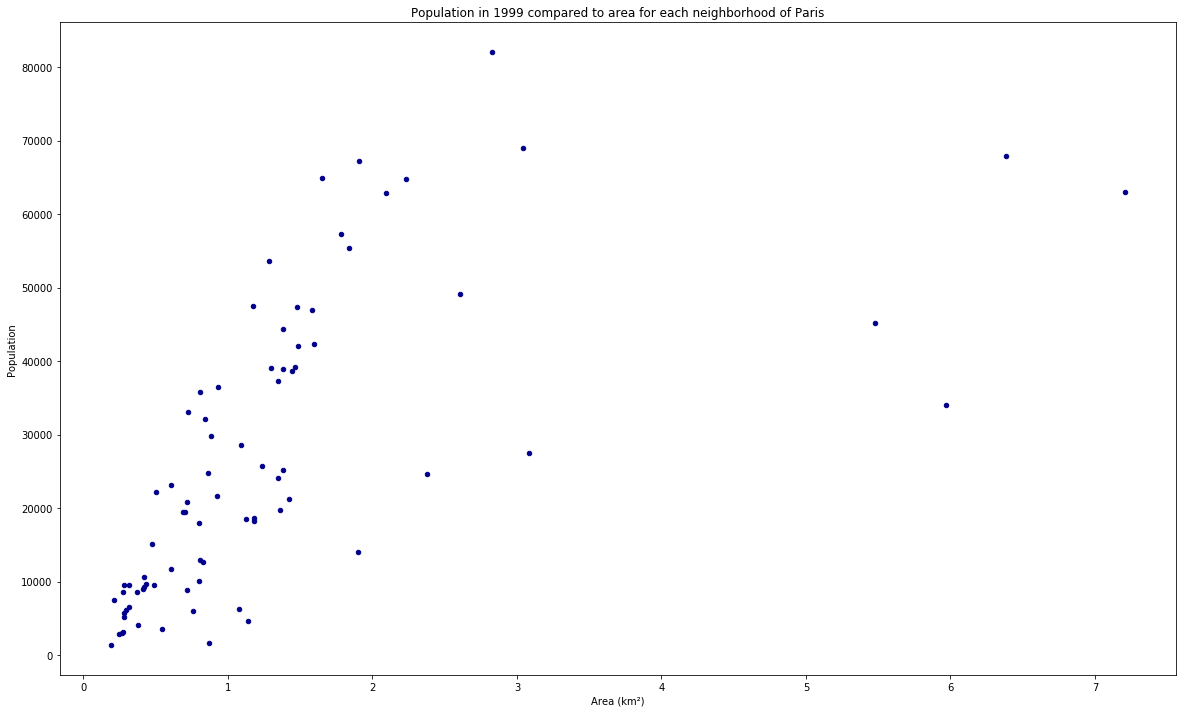

In [101]:
scatter_plot_df.plot(kind='scatter', x='Area', y='Population', figsize=(20, 12), color='darkblue')

plt.title('Population in 1999 compared to area for each neighborhood of Paris')
plt.xlabel('Area (km²)')
plt.ylabel('Population')

plt.show()

In [102]:
bar_chart_df = paris_neighborhoods[['Neighborhood', 'District', 'Population', 'Area']].copy()
bar_chart_df.set_index(['District', 'Neighborhood'], inplace=True)

bar_chart_df['Density'] = bar_chart_df['Population'] / bar_chart_df['Area']

print('The dataframe shape is {}.'.format(bar_chart_df.shape))
print('The dataframe types are:\n{}.'.format(bar_chart_df.dtypes))
bar_chart_df.head()

The dataframe shape is (80, 3).
The dataframe types are:
Population      int64
Area          float64
Density       float64
dtype: object.


,,Population,Area,Density
District,Neighborhood,,,
9th arrondissement,Rochechouart,22212,0.500435,44385.347911
12th arrondissement,Bercy,13987,1.902932,7350.235593
1st arrondissement,Halles,8984,0.412458,21781.585493
4th arrondissement,Arsenal,9474,0.487265,19443.221293
5th arrondissement,Jardin-des-Plantes,18005,0.798389,22551.652157


In [103]:
bar_chart_neighborhood_df = bar_chart_df[['Density']].sort_values(by=['Density'], ascending=True)

print('The dataframe shape is {}.'.format(bar_chart_neighborhood_df.shape))
print('The dataframe types are:\n{}.'.format(bar_chart_neighborhood_df.dtypes))
bar_chart_neighborhood_df.head()

The dataframe shape is (80, 1).
The dataframe types are:
Density    float64
dtype: object.


,,Density
District,Neighborhood,
1st arrondissement,Saint-Germain-l'Auxerrois,1924.049162
8th arrondissement,Champs-Elysées,4046.466869
12th arrondissement,Bel-Air,5690.244910
7th arrondissement,Invalides,5845.024327
9th arrondissement,Chaussée-d'Antin,6418.358062


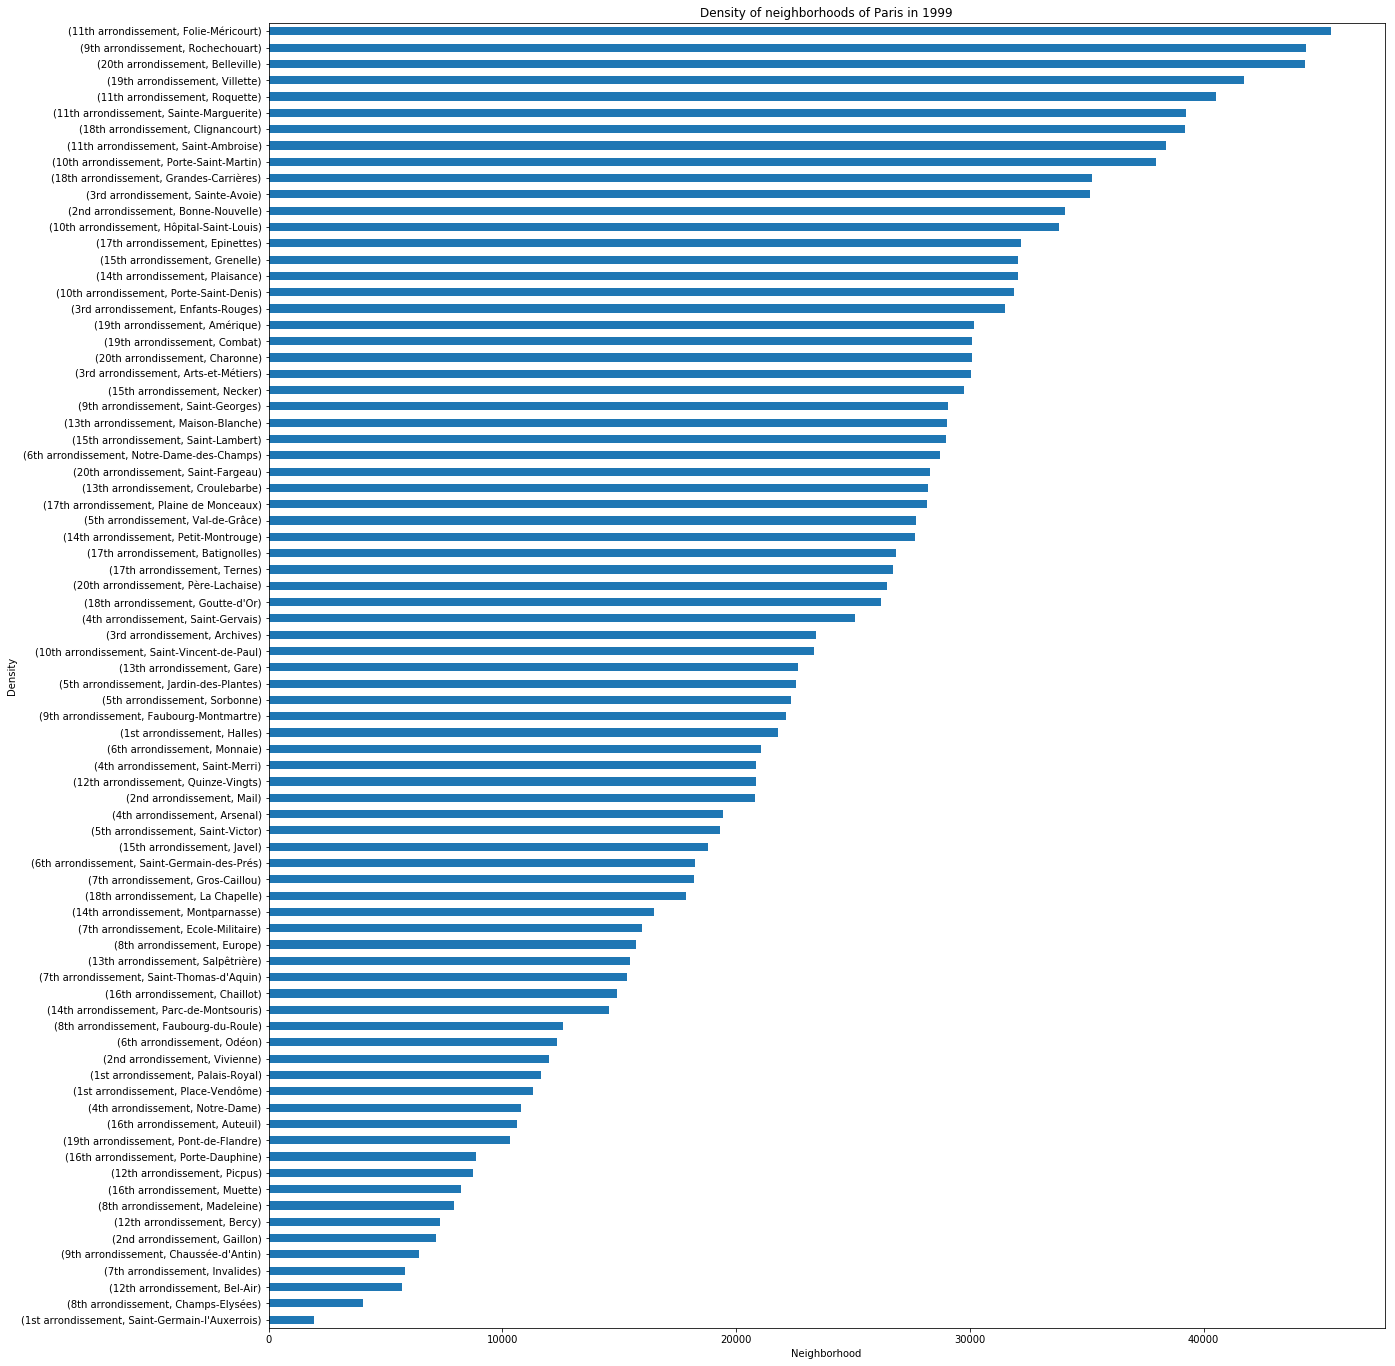

In [104]:
bar_chart_neighborhood_df.plot(kind='barh', figsize=(20, 24))

plt.xlabel('Neighborhood')
plt.ylabel('Density')
plt.title('Density of neighborhoods of Paris in 1999')
plt.legend().remove()

plt.show()

In [105]:
bar_chart_district_df = bar_chart_df.groupby('District').sum()
bar_chart_district_df['Density'] = bar_chart_district_df['Population'] / bar_chart_district_df['Area']
bar_chart_district_df = bar_chart_district_df[['Density']].sort_values(by=['Density'], ascending=True)

print('The dataframe shape is {}.'.format(bar_chart_district_df.shape))
print('The dataframe types are:\n{}.'.format(bar_chart_district_df.dtypes))
bar_chart_district_df.head()

The dataframe shape is (20, 1).
The dataframe types are:
Density    float64
dtype: object.


,Density
District,
12th arrondissement,8376.574893
1st arrondissement,9259.499113
16th arrondissement,9883.439126
8th arrondissement,10129.543710
7th arrondissement,13933.301305


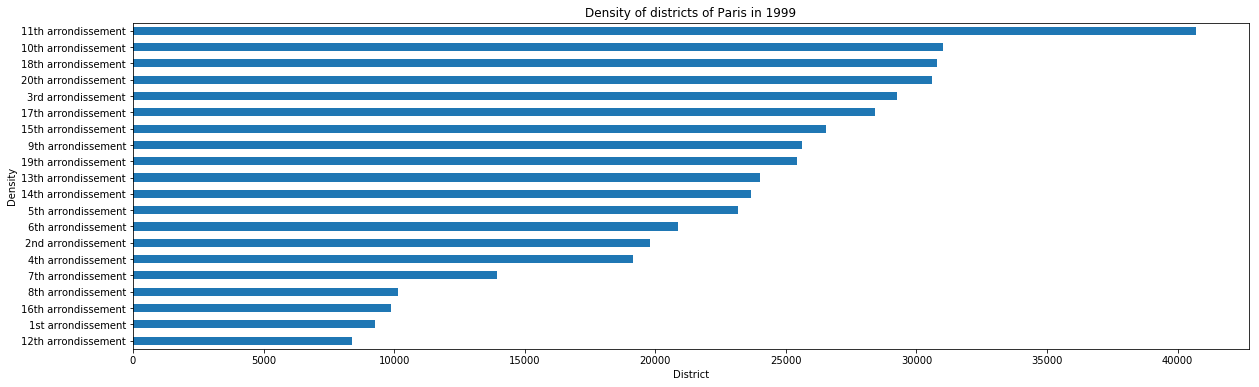

In [106]:
bar_chart_district_df.plot(kind='barh', figsize=(20, 6))

plt.xlabel('District')
plt.ylabel('Density')
plt.title('Density of districts of Paris in 1999')
plt.legend().remove()

plt.show()

## Analyse the localisation of restaurants

In [107]:
def get_venues(latitude, longitude, category=FOURSQUARE_CATEGORY, radius=FOURSQUARE_RADIUS, limit=FOURSQUARE_LIMIT):
    url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}&intent=browse'.format(
            FOURSQUARE_CLIENT_ID, 
            FOURSQUARE_CLIENT_SECRET, 
            FOURSQUARE_VERSION, 
            latitude, 
            longitude,
            category,
            radius, 
            limit)
    
    results = requests.get(url).json()
    
    venues = []
    for venue in results['response']['venues']:
        try:
            id = venue['id']
            name = venue['name']
            latitude = venue['location']['lat']
            longitude = venue['location']['lng']
            venues.append([id, name, latitude, longitude])
        except KeyError:
            pass
    
    columns = ['id', 'Name', 'Latitude', 'Longitude']
    
    df = pd.DataFrame(venues,columns=columns)
    return df

In [108]:
restaurants_foursquare = None

if FOURSQUARE_UPDATE:
    for id, neighborhood in paris_neighborhoods.iterrows():
        restaurants_neighborhood = get_venues(neighborhood['Latitude'], neighborhood['Longitude'])
        restaurants_foursquare = pd.concat([restaurants_foursquare, restaurants_neighborhood], ignore_index=True, sort=False)
    restaurants_foursquare.drop_duplicates(subset='id', keep='first', inplace=True) 
    project.save_data(file_name='restaurants_foursquare.csv', data=restaurants_foursquare.to_csv(index=False), overwrite=True)
    print('File restaurants_foursquare.csv saved.')
else:
    restaurants_foursquare_file = project.get_file('restaurants_foursquare.csv')
    restaurants_foursquare = pd.read_csv(restaurants_foursquare_file)
    print('File restaurants_foursquare.csv loaded.')

print('The dataframe shape is {}.'.format(restaurants_foursquare.shape))
print('The dataframe types are:\n{}.'.format(restaurants_foursquare.dtypes))
restaurants_foursquare.head()

File venues.csv loaded.
The dataframe shape is (189, 4).
The dataframe types are:
id            object
Name          object
Latitude     float64
Longitude    float64
dtype: object.


,id,Name,Latitude,Longitude
0,4ea456aa61af76b39d5803a1,La Belle de Liron,48.866846,2.347244
1,4b5ff171f964a5204cd129e3,Nautilus Food,48.872344,2.342870
2,4bd2011c046076b0bb017371,Léon de Bruxelles,48.883684,2.327870
3,4b8137c8f964a520e09a30e3,La Criée,48.870531,2.348942
4,56b8e71c498e33f2f695cd55,Restaurant Le Sichuan,48.870730,2.355052


In [109]:
restaurants_foursquare.describe()

,Latitude,Longitude
count,189.000000,189.000000
mean,48.861465,2.330261
std,0.016912,0.031417
min,48.815160,2.239556
25%,48.850952,2.313317
50%,48.862078,2.333255
75%,48.874305,2.351608
max,48.902006,2.407587


In [110]:
try:
    from shapely.geometry import Point, shape
except:
    print('shapely not installed, installing folium.')
    !conda install -c conda-forge shapely
    print('shapely installed.')
    from shapely.geometry import Point, shape
print('shapely.geometry imported.')

print('All libraries imported.')

shapely.geometry imported.
All libraries imported.


In [111]:
restaurants_paris = pd.DataFrame(columns=['id', 'Name', 'Latitude', 'Longitude', 'NeighborhoodCode'])

paris_neighborhoods_geo_file = project.get_file('paris_neighborhoods_geo.json')
paris_neighborhoods_geo = pd.read_json(paris_neighborhoods_geo_file)
print('File paris_neighborhoods_geo.json loaded.')

for id, restaurant in restaurants_foursquare.iterrows():
    restaurant_location = Point(restaurant['Longitude'], restaurant['Latitude'])

    for feature in paris_neighborhoods_geo['features']:
        neighborhood = shape(feature['geometry'])
        if restaurant_location.within(neighborhood):
            restaurants_paris = restaurants_paris.append({'id': restaurant['id'], 'Name': restaurant['Name'], 'Latitude': restaurant['Latitude'], 'Longitude': restaurant['Longitude'], 'NeighborhoodCode': feature['properties']['c_quinsee']}, ignore_index=True, sort=False)
            break

print('The dataframe shape is {}.'.format(restaurants_paris.shape))
print('The dataframe types are:\n{}.'.format(restaurants_paris.dtypes))
restaurants_paris.head()

File paris_neighborhoods_geo.json loaded.
The dataframe shape is (180, 5).
The dataframe types are:
id                   object
Name                 object
Latitude            float64
Longitude           float64
NeighborhoodCode     object
dtype: object.


,id,Name,Latitude,Longitude,NeighborhoodCode
0,4ea456aa61af76b39d5803a1,La Belle de Liron,48.866846,2.347244,7510203
1,4b5ff171f964a5204cd129e3,Nautilus Food,48.872344,2.342870,7510903
2,4bd2011c046076b0bb017371,Léon de Bruxelles,48.883684,2.327870,7511801
3,4b8137c8f964a520e09a30e3,La Criée,48.870531,2.348942,7511002
4,56b8e71c498e33f2f695cd55,Restaurant Le Sichuan,48.870730,2.355052,7511003


In [112]:
project.save_data(file_name=RESTAURANT_CATEGORY+'_restaurants_paris.csv', data=restaurants_paris.to_csv(index=False), overwrite=True)
print('File ' + RESTAURANT_CATEGORY + '_restaurants_paris.csv saved.')

File seafood_restaurants_paris.csv saved.


In [113]:
restaurants_map = folium.map.FeatureGroup()

for latitude, longitude, name in restaurants_paris[['Latitude', 'Longitude', 'Name']].values:
    restaurants_map.add_child(
        folium.CircleMarker(
            [latitude, longitude],
            radius=5,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            popup=name
        )
    )
    
paris_map.add_child(restaurants_map)

paris_map

In [114]:
bar_chart_df = pd.merge(paris_neighborhoods[['NeighborhoodCode', 'Neighborhood', 'District',]], restaurants_paris[['NeighborhoodCode', 'id']], on='NeighborhoodCode', how='outer')
bar_chart_df.drop(['NeighborhoodCode'], axis='columns', inplace=True)
bar_chart_df.set_index(['District', 'Neighborhood'], inplace=True)

print('The dataframe shape is {}.'.format(bar_chart_df.shape))
print('The dataframe types are:\n{}.'.format(bar_chart_df.dtypes))
bar_chart_df.head()

The dataframe shape is (196, 1).
The dataframe types are:
id    object
dtype: object.


id
District            Neighborhood                          
9th arrondissement  Rochechouart  5a8499dea2c00b44bf6bd571
                    Rochechouart  508c5b00e4b017e578494b13
                    Rochechouart  5ab570ced41bb7645d9d520e
12th arrondissement Bercy         5135e093e4b04c44ea76c7c4
                    Bercy         4e6b47cfe4cdb37551ef49e3

In [115]:
bar_chart_neighborhood_df = bar_chart_df.groupby(['District', 'Neighborhood']).count()
bar_chart_neighborhood_df.rename(columns={'id': 'RestaurantsCount'}, inplace=True)
bar_chart_neighborhood_df = bar_chart_neighborhood_df.sort_values(by=['RestaurantsCount'], ascending=True)

print('The dataframe shape is {}.'.format(bar_chart_neighborhood_df.shape))
print('The dataframe types are:\n{}.'.format(bar_chart_neighborhood_df.dtypes))
bar_chart_neighborhood_df.head()

The dataframe shape is (80, 1).
The dataframe types are:
VenueCount    int64
dtype: object.


,,VenueCount
District,Neighborhood,
10th arrondissement,Hôpital-Saint-Louis,0
1st arrondissement,Saint-Germain-l'Auxerrois,0
2nd arrondissement,Vivienne,0
17th arrondissement,Epinettes,0
4th arrondissement,Notre-Dame,0


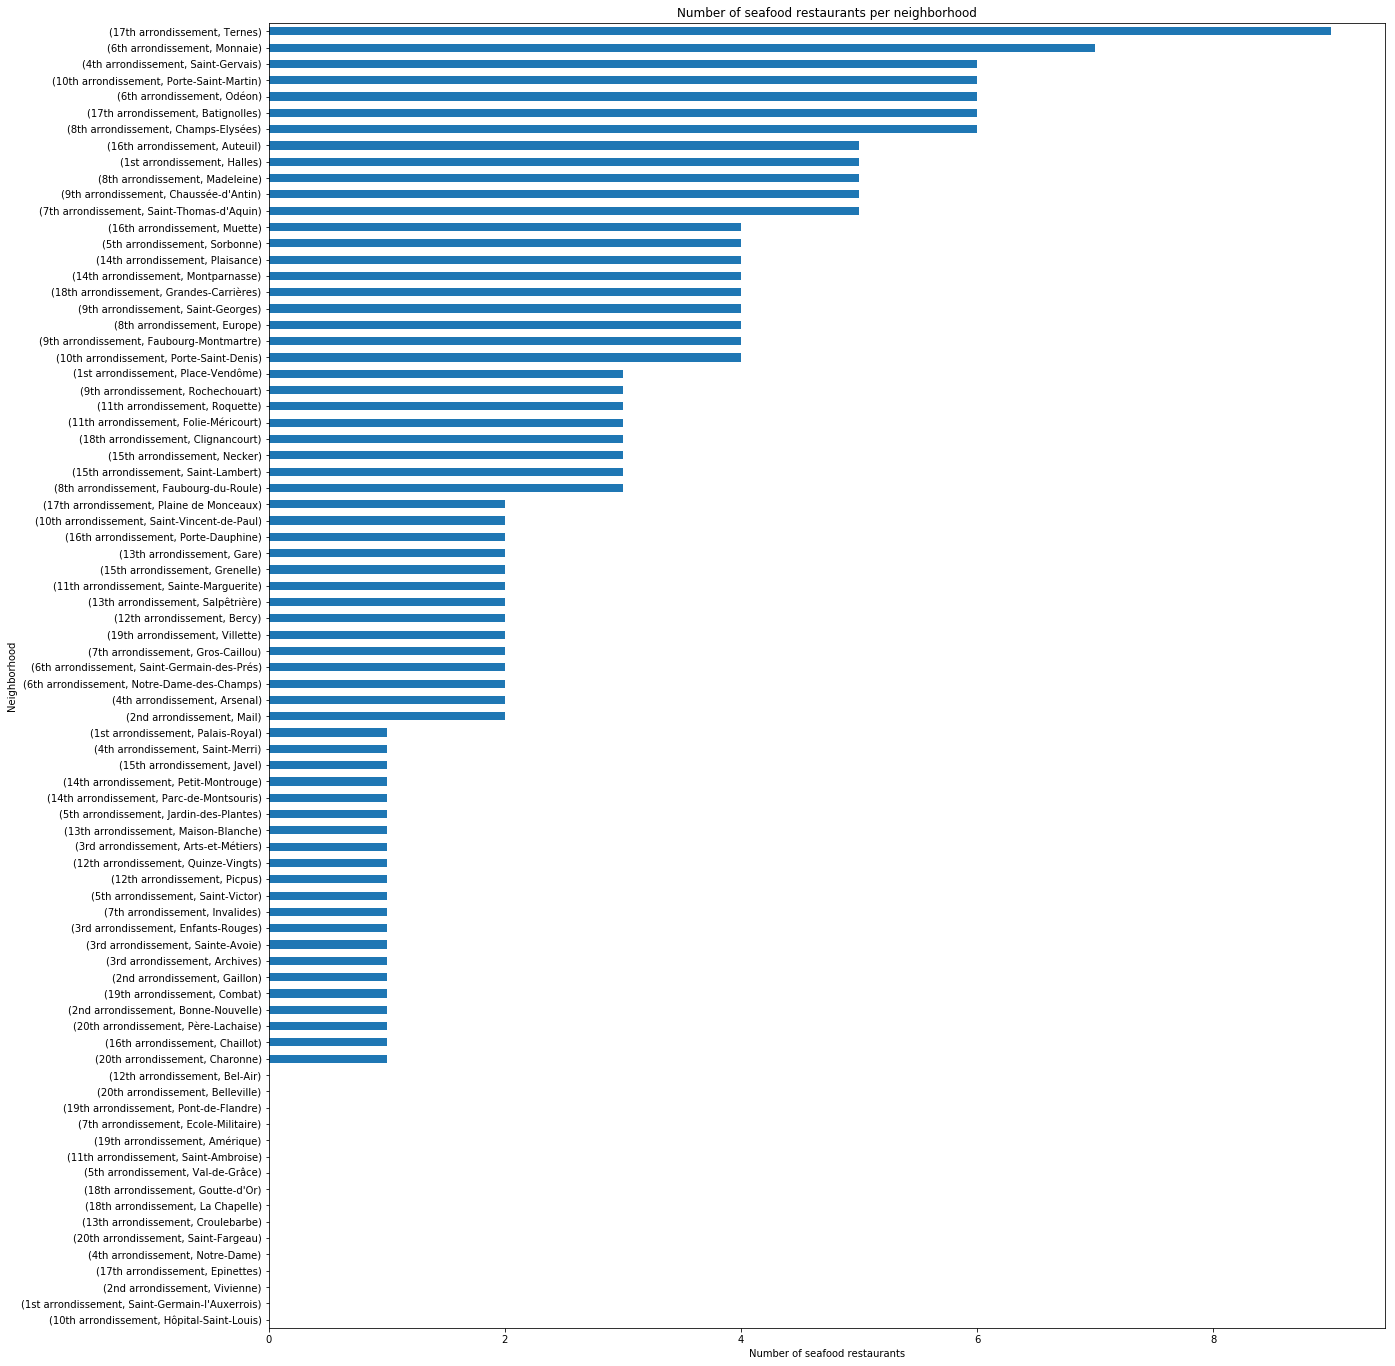

In [116]:
bar_chart_neighborhood_df.plot(kind='barh', figsize=(20, 24))

plt.xlabel('Number of ' + RESTAURANT_CATEGORY + ' restaurants')
plt.ylabel('Neighborhood')
plt.title('Number of ' + RESTAURANT_CATEGORY + ' restaurants per neighborhood')
plt.legend().remove()

plt.show()

In [117]:
bar_chart_neighborhood_df2 = pd.merge(bar_chart_neighborhood_df, paris_neighborhoods, on='Neighborhood')
bar_chart_neighborhood_df2 = bar_chart_neighborhood_df2[['Neighborhood', 'RestaurantsCount', 'District', 'Population']]
bar_chart_neighborhood_df2['RestaurantsPerMillionInhabitants'] = bar_chart_neighborhood_df2['RestaurantsCount'] / bar_chart_neighborhood_df2['Population'] * 1e6
bar_chart_neighborhood_df2 = bar_chart_neighborhood_df2[['Neighborhood', 'RestaurantsPerMillionInhabitants', 'District']]
bar_chart_neighborhood_df2.set_index(['District', 'Neighborhood'], inplace=True)
bar_chart_neighborhood_df2 = bar_chart_neighborhood_df2.sort_values(by=['RestaurantsPerMillionInhabitants'], ascending=True)

print('The dataframe shape is {}.'.format(bar_chart_neighborhood_df2.shape))
print('The dataframe types are:\n{}.'.format(bar_chart_neighborhood_df2.dtypes))
bar_chart_neighborhood_df2.head()

The dataframe shape is (80, 1).
The dataframe types are:
VenuePerMillionInhabitants    float64
dtype: object.


,,VenuePerMillionInhabitants
District,Neighborhood,
10th arrondissement,Hôpital-Saint-Louis,0.0
12th arrondissement,Bel-Air,0.0
20th arrondissement,Belleville,0.0
19th arrondissement,Pont-de-Flandre,0.0
7th arrondissement,Ecole-Militaire,0.0


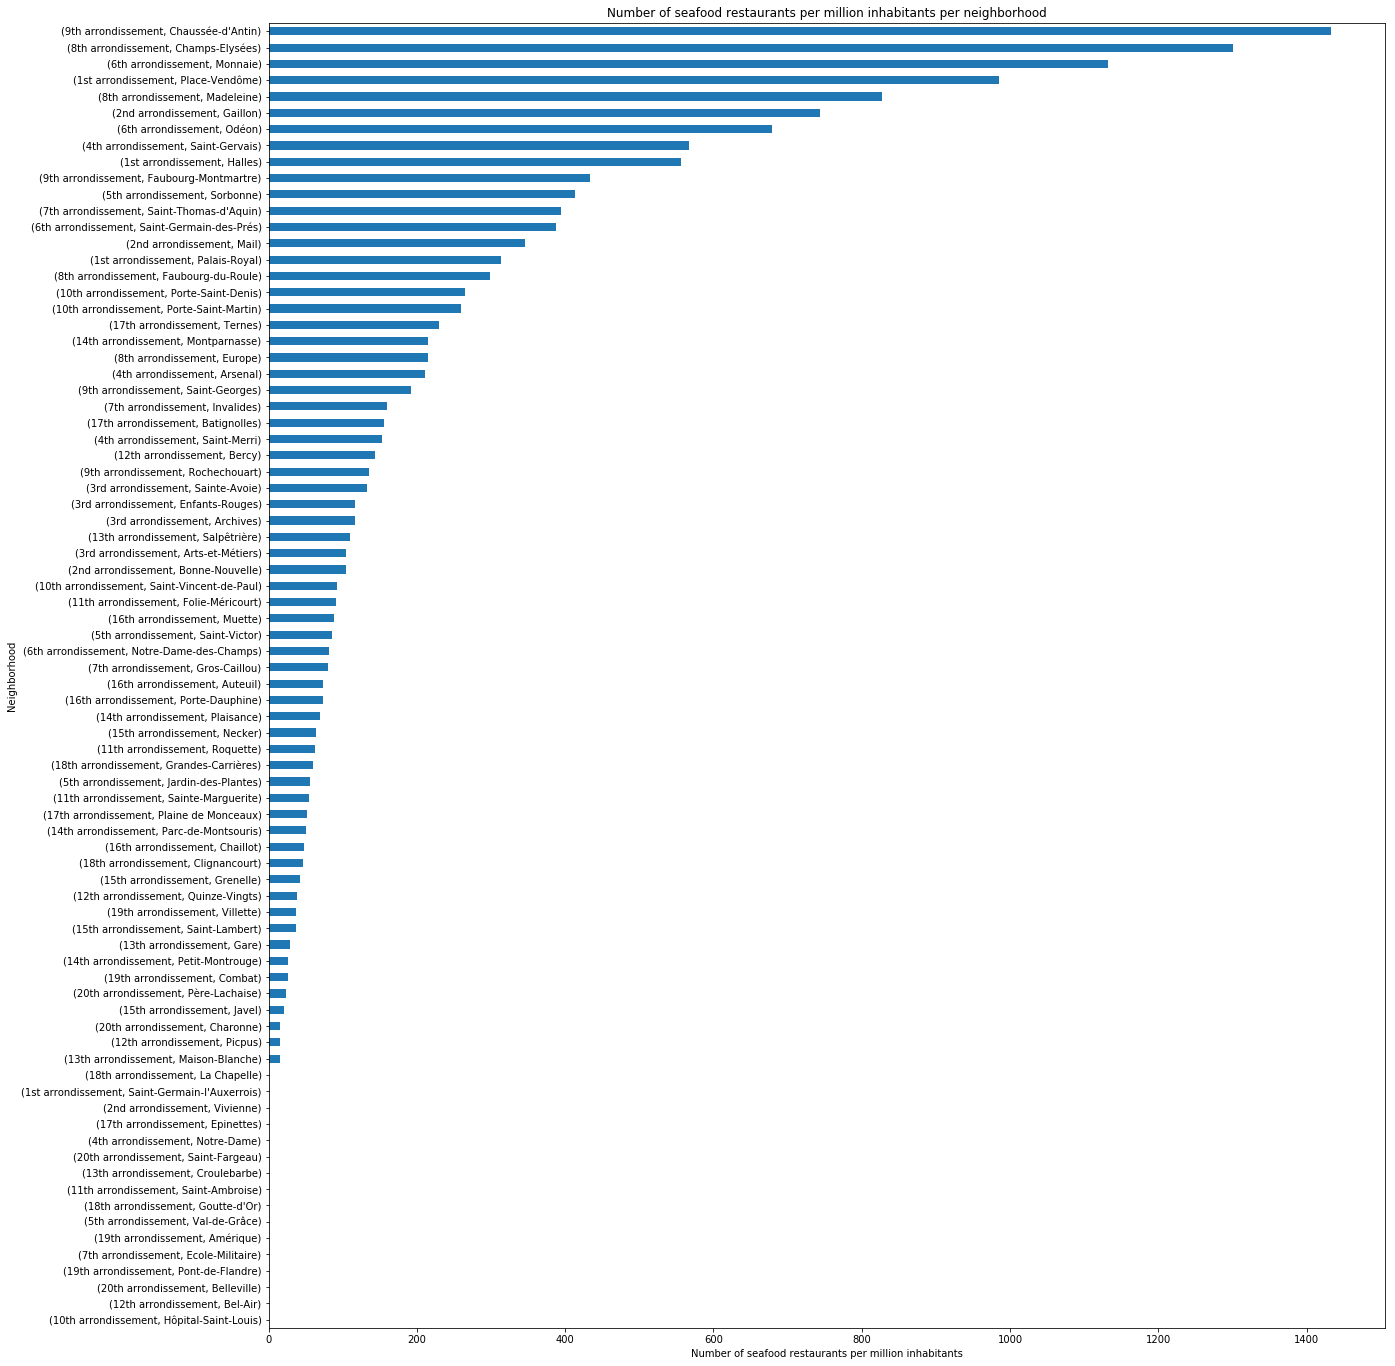

In [118]:
bar_chart_neighborhood_df2.plot(kind='barh', figsize=(20, 24))

plt.xlabel('Number of ' + RESTAURANT_CATEGORY + ' restaurants per million inhabitants')
plt.ylabel('Neighborhood')
plt.title('Number of ' + RESTAURANT_CATEGORY + ' restaurants per million inhabitants per neighborhood')
plt.legend().remove()

plt.show()

In [119]:
bar_chart_district_df = bar_chart_df.groupby(['District']).count()
bar_chart_district_df.rename(columns={'id': 'RestaurantsCount'}, inplace=True)
bar_chart_district_df = bar_chart_district_df.sort_values(by=['RestaurantsCount'], ascending=True)

print('The dataframe shape is {}.'.format(bar_chart_district_df.shape))
print('The dataframe types are:\n{}.'.format(bar_chart_district_df.dtypes))
bar_chart_district_df.head()

The dataframe shape is (20, 1).
The dataframe types are:
VenueCount    int64
dtype: object.


,VenueCount
District,
20th arrondissement,2
19th arrondissement,3
12th arrondissement,4
2nd arrondissement,4
3rd arrondissement,4


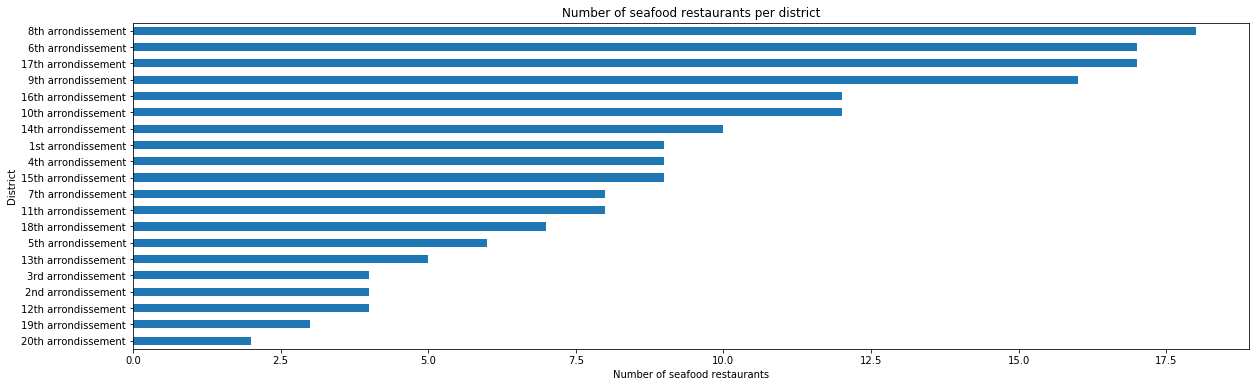

In [120]:
bar_chart_district_df.plot(kind='barh', figsize=(20, 6))

plt.xlabel('Number of ' + RESTAURANT_CATEGORY + ' restaurants')
plt.ylabel('District')
plt.title('Number of ' + RESTAURANT_CATEGORY + ' restaurants per district')
plt.legend().remove()

plt.show()

In [121]:
bar_chart_district_df2 = pd.merge(bar_chart_neighborhood_df, paris_neighborhoods, on='Neighborhood', how='outer')
bar_chart_district_df2 = bar_chart_district_df2[['RestaurantsCount', 'District', 'Population']]
bar_chart_district_df2 = bar_chart_district_df2.groupby(['District']).sum()
bar_chart_district_df2['RestaurantsPerMillionInhabitants'] = bar_chart_district_df2['RestaurantsCount'] / bar_chart_district_df2['Population'] * 1e6
bar_chart_district_df2 = bar_chart_district_df2[['RestaurantsPerMillionInhabitants']]
bar_chart_district_df2 = bar_chart_district_df2.sort_values(by=['RestaurantsPerMillionInhabitants'], ascending=True)

print('The dataframe shape is {}.'.format(bar_chart_district_df2.shape))
print('The dataframe types are:\n{}.'.format(bar_chart_district_df2.dtypes))
bar_chart_district_df2.head()

The dataframe shape is (20, 1).
The dataframe types are:
VenuePerMillionInhabitants    float64
dtype: object.


,VenuePerMillionInhabitants
District,
20th arrondissement,10.923411
19th arrondissement,17.382538
13th arrondissement,29.141435
12th arrondissement,29.269292
18th arrondissement,37.923730


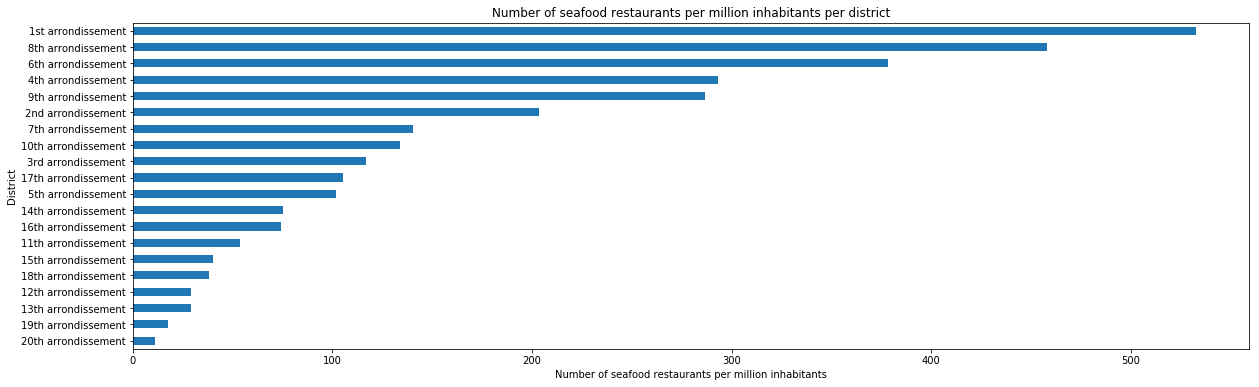

In [122]:
bar_chart_district_df2.plot(kind='barh', figsize=(20, 6))

plt.xlabel('Number of ' + RESTAURANT_CATEGORY + ' restaurants per million inhabitants')
plt.ylabel('District')
plt.title('Number of ' + RESTAURANT_CATEGORY + ' restaurants per million inhabitants per district')
plt.legend().remove()

plt.show()

## More details regarding restaurants

In [123]:
def get_venue_details(venue_id, category=FOURSQUARE_CATEGORY):
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            FOURSQUARE_CLIENT_ID, 
            FOURSQUARE_CLIENT_SECRET, 
            FOURSQUARE_VERSION)

    results = requests.get(url).json()
    venue_data = results['response']['venue']
    
    try:
        name = venue_data['name']
    except KeyError:
        name = np.nan
    
    try:
        price = venue_data['price']['tier']
    except KeyError:
        price = np.nan
    
    try:
        price_description = venue_data['price']['message']
    except KeyError:
        price_description = np.nan
    
    try:
        rating = venue_data['rating']
    except KeyError:
        rating = np.nan
        
    try:
        likes = venue_data['likes']['count']
    except KeyError:
        likes = np.nan
    
    try:
        tips_count = venue_data['tips']['count']
    except KeyError:
        tips_count = np.nan
    
    try:
        if category is not None:
            is_primary_category = False
            for venue_category in venue_data['categories']:
                if venue_category['id'] == category and venue_category['primary'] is True:
                    is_primary_category = True
        else:
            is_primary_category = np.nan;
    except KeyError:
        is_primary_category = np.nan
        
    venue = {'id': venue_id, 'Name': name, 'Price': price, 'PriceDescription': price_description, 'Rating': rating, 'Likes': likes, 'TipsCount': tips_count, 'IsPrimaryCategory': is_primary_category}

    return venue

In [151]:
restaurants_paris_details = pd.DataFrame(columns=['id', 'Name', 'Latitude', 'Longitude', 'Price', 'PriceDescription', 'Rating', 'Likes', 'TipsCount', 'IsPrimaryCategory', 'NeighborhoodCode'])

restaurants_paris_file = project.get_file(RESTAURANT_CATEGORY+'_restaurants_paris.csv')
restaurants_paris = pd.read_csv(restaurants_paris_file)
print('File ' + RESTAURANT_CATEGORY + '_restaurants_paris.csv loaded.')

if FOURSQUARE_UPDATE:
    for restaurant_id, restaurant in restaurants_paris.iterrows():
        restaurant_details = get_venue_details(restaurant['id'])
        restaurants_paris_details = restaurants_paris_details.append({'id': restaurant['id'], 'Name': restaurant_details['Name'], 'Latitude': restaurant['Latitude'], 'Longitude': restaurant['Longitude'], 'Price': restaurant_details['Price'], 'PriceDescription': restaurant_details['PriceDescription'], 'Rating': restaurant_details['Rating'], 'Likes': restaurant_details['Likes'], 'TipsCount': restaurant_details['TipsCount'], 'IsPrimaryCategory': restaurant_details['IsPrimaryCategory'], 'NeighborhoodCode': restaurant['NeighborhoodCode']}, ignore_index=True, sort=False)
        
    project.save_data(file_name=RESTAURANT_CATEGORY+'_restaurants_paris_details.csv', data=restaurants_paris_details.to_csv(index=False), overwrite=True)
    print('File ' + RESTAURANT_CATEGORY + '_restaurants_paris_details.csv saved.')
else:
    restaurants_paris_details_file = project.get_file(RESTAURANT_CATEGORY+'_restaurants_paris_details.csv')
    restaurants_paris_details = pd.read_csv(restaurants_paris_details_file)
    print('File ' + RESTAURANT_CATEGORY + '_restaurants_paris_details.csv loaded.')

restaurants_paris_details = restaurants_paris_details.astype({'IsPrimaryCategory': bool})
    
print('The dataframe shape is {}.'.format(restaurants_paris_details.shape))
print('The dataframe types are:\n{}.'.format(restaurants_paris_details.dtypes))
restaurants_paris_details.head()

File seafood_restaurants_paris.csv loaded.
File seafood_restaurants_paris_details.csv loaded.
The dataframe shape is (180, 11).
The dataframe types are:
id                    object
Name                  object
Latitude             float64
Longitude            float64
Price                float64
PriceDescription      object
Rating               float64
Likes                  int64
TipsCount              int64
IsPrimaryCategory       bool
NeighborhoodCode       int64
dtype: object.


,id,Name,Latitude,Longitude,Price,PriceDescription,Rating,Likes,TipsCount,IsPrimaryCategory,NeighborhoodCode
0,4ea456aa61af76b39d5803a1,La Belle de Liron,48.866846,2.347244,3.0,Expensive,NaN,0,0,True,7510203
1,4b5ff171f964a5204cd129e3,Nautilus Food,48.872344,2.342870,3.0,Expensive,NaN,0,0,True,7510903
2,4bd2011c046076b0bb017371,Léon de Bruxelles,48.883684,2.327870,3.0,Expensive,6.9,46,19,True,7511801
3,4b8137c8f964a520e09a30e3,La Criée,48.870531,2.348942,3.0,Expensive,7.9,28,9,True,7511002
4,56b8e71c498e33f2f695cd55,Restaurant Le Sichuan,48.870730,2.355052,3.0,Expensive,NaN,0,0,True,7511003


In [125]:
scatter_plot_neighborhood_df = pd.merge(paris_neighborhoods[['NeighborhoodCode', 'Neighborhood', 'District',]], restaurants_paris_details[['NeighborhoodCode', 'Price', 'Rating']], on='NeighborhoodCode', how='outer')
scatter_plot_neighborhood_df.drop(['NeighborhoodCode'], axis='columns', inplace=True)
scatter_plot_neighborhood_df.set_index(['District', 'Neighborhood'], inplace=True)

print('The dataframe shape is {}.'.format(scatter_plot_neighborhood_df.shape))
print('The dataframe types are:\n{}.'.format(scatter_plot_neighborhood_df.dtypes))
scatter_plot_neighborhood_df.head()

The dataframe shape is (196, 2).
The dataframe types are:
Price     float64
Rating    float64
dtype: object.


Price  Rating
District            Neighborhood               
9th arrondissement  Rochechouart    3.0     NaN
                    Rochechouart    3.0     NaN
                    Rochechouart    3.0     NaN
12th arrondissement Bercy           2.0     7.6
                    Bercy           3.0     8.6

In [126]:
scatter_plot_neighborhood_df2 = scatter_plot_neighborhood_df.dropna(subset=['Price', 'Rating']).copy()

print('The dataframe shape is {}.'.format(scatter_plot_neighborhood_df2.shape))
print('The dataframe types are:\n{}.'.format(scatter_plot_neighborhood_df2.dtypes))
scatter_plot_neighborhood_df2.head()

The dataframe shape is (86, 2).
The dataframe types are:
Price     float64
Rating    float64
dtype: object.


Price  Rating
District            Neighborhood               
12th arrondissement Bercy           2.0     7.6
                    Bercy           3.0     8.6
1st arrondissement  Halles          3.0     7.7
                    Halles          3.0     6.5
4th arrondissement  Arsenal         3.0     7.0

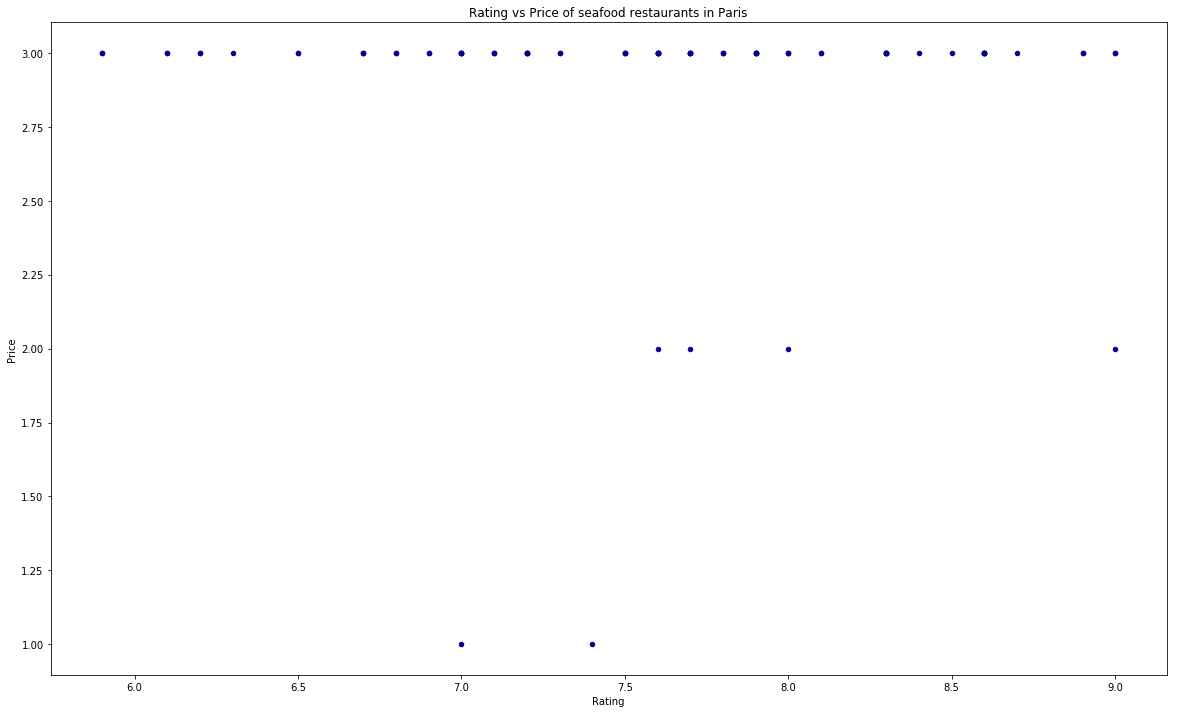

In [127]:
scatter_plot_neighborhood_df2.plot(kind='scatter', x='Rating', y='Price', figsize=(20, 12), color='darkblue')

plt.title('Rating vs Price of ' + RESTAURANT_CATEGORY + ' restaurants in Paris')
plt.xlabel('Rating')
plt.ylabel('Price')

plt.show()

In [128]:
bar_chart_df = scatter_plot_neighborhood_df.groupby(['District', 'Neighborhood']).mean()

print('The dataframe shape is {}.'.format(bar_chart_df.shape))
print('The dataframe types are:\n{}.'.format(bar_chart_df.dtypes))
bar_chart_df.head()

The dataframe shape is (80, 2).
The dataframe types are:
Price     float64
Rating    float64
dtype: object.


Price  Rating
District            Neighborhood                           
10th arrondissement Hôpital-Saint-Louis         NaN     NaN
                    Porte-Saint-Denis      3.000000    7.55
                    Porte-Saint-Martin     2.666667    8.20
                    Saint-Vincent-de-Paul  3.000000    8.30
11th arrondissement Folie-Méricourt        2.333333    6.50

In [129]:
bar_chart_neighborhood_rating_df = bar_chart_df[['Rating']].copy()
bar_chart_neighborhood_rating_df = bar_chart_neighborhood_rating_df.sort_values(by=['Rating'], ascending=True)
bar_chart_neighborhood_rating_df.dropna(subset=['Rating'], inplace=True)

print('The dataframe shape is {}.'.format(bar_chart_neighborhood_rating_df.shape))
print('The dataframe types are:\n{}.'.format(bar_chart_neighborhood_rating_df.dtypes))
bar_chart_neighborhood_rating_df.head()

The dataframe shape is (45, 1).
The dataframe types are:
Rating    float64
dtype: object.


,,Rating
District,Neighborhood,
11th arrondissement,Sainte-Marguerite,5.90
3rd arrondissement,Archives,6.20
15th arrondissement,Necker,6.45
11th arrondissement,Folie-Méricourt,6.50
15th arrondissement,Saint-Lambert,6.75


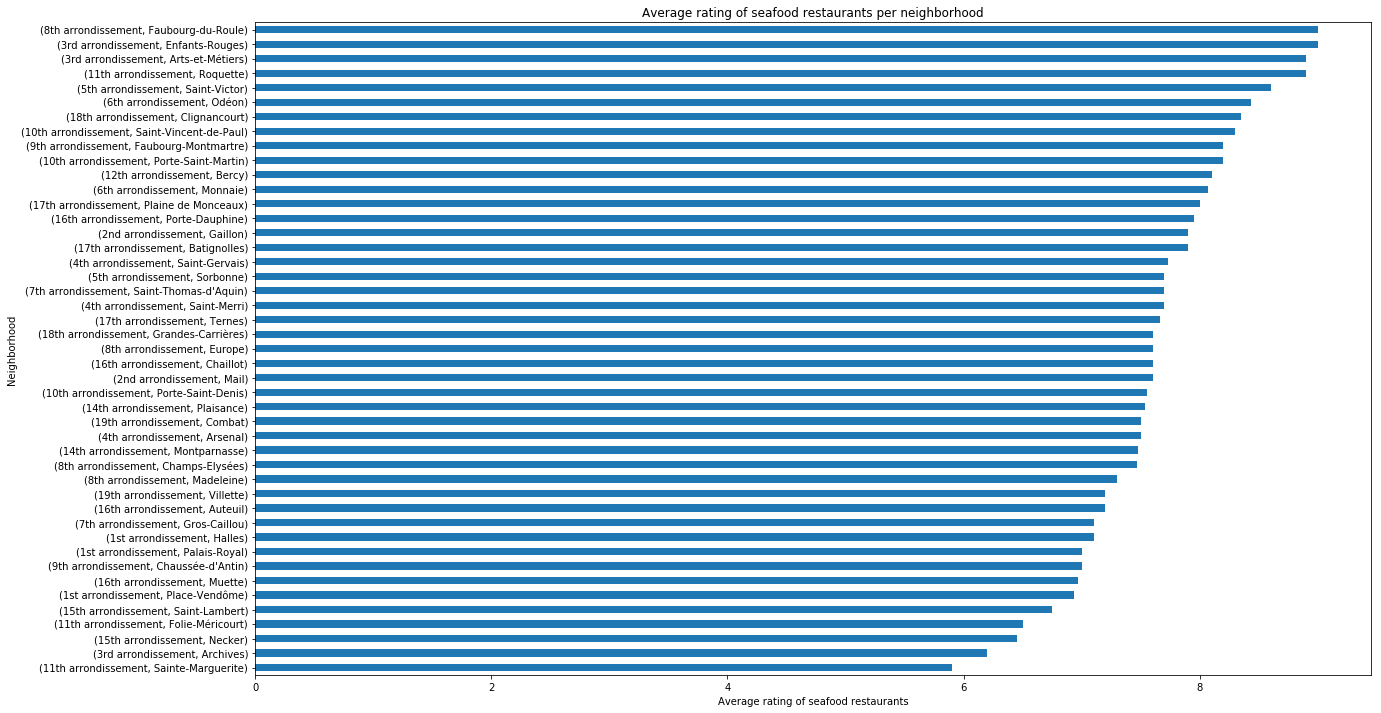

In [130]:
bar_chart_neighborhood_rating_df.plot(kind='barh', figsize=(20, 12))

plt.xlabel('Average rating of ' + RESTAURANT_CATEGORY + ' restaurants')
plt.ylabel('Neighborhood')
plt.title('Average rating of ' + RESTAURANT_CATEGORY + ' restaurants per neighborhood')
plt.legend().remove()

plt.show()

In [131]:
bar_chart_neighborhood_price_df = bar_chart_df[['Price']].copy()
bar_chart_neighborhood_price_df = bar_chart_neighborhood_price_df.sort_values(by=['Price'], ascending=True)
bar_chart_neighborhood_price_df.dropna(subset=['Price'], inplace=True)

print('The dataframe shape is {}.'.format(bar_chart_neighborhood_price_df.shape))
print('The dataframe types are:\n{}.'.format(bar_chart_neighborhood_price_df.dtypes))
bar_chart_neighborhood_price_df.head()

The dataframe shape is (64, 1).
The dataframe types are:
Price    float64
dtype: object.


,,Price
District,Neighborhood,
12th arrondissement,Quinze-Vingts,2.000000
3rd arrondissement,Enfants-Rouges,2.000000
11th arrondissement,Folie-Méricourt,2.333333
14th arrondissement,Montparnasse,2.333333
12th arrondissement,Bercy,2.500000


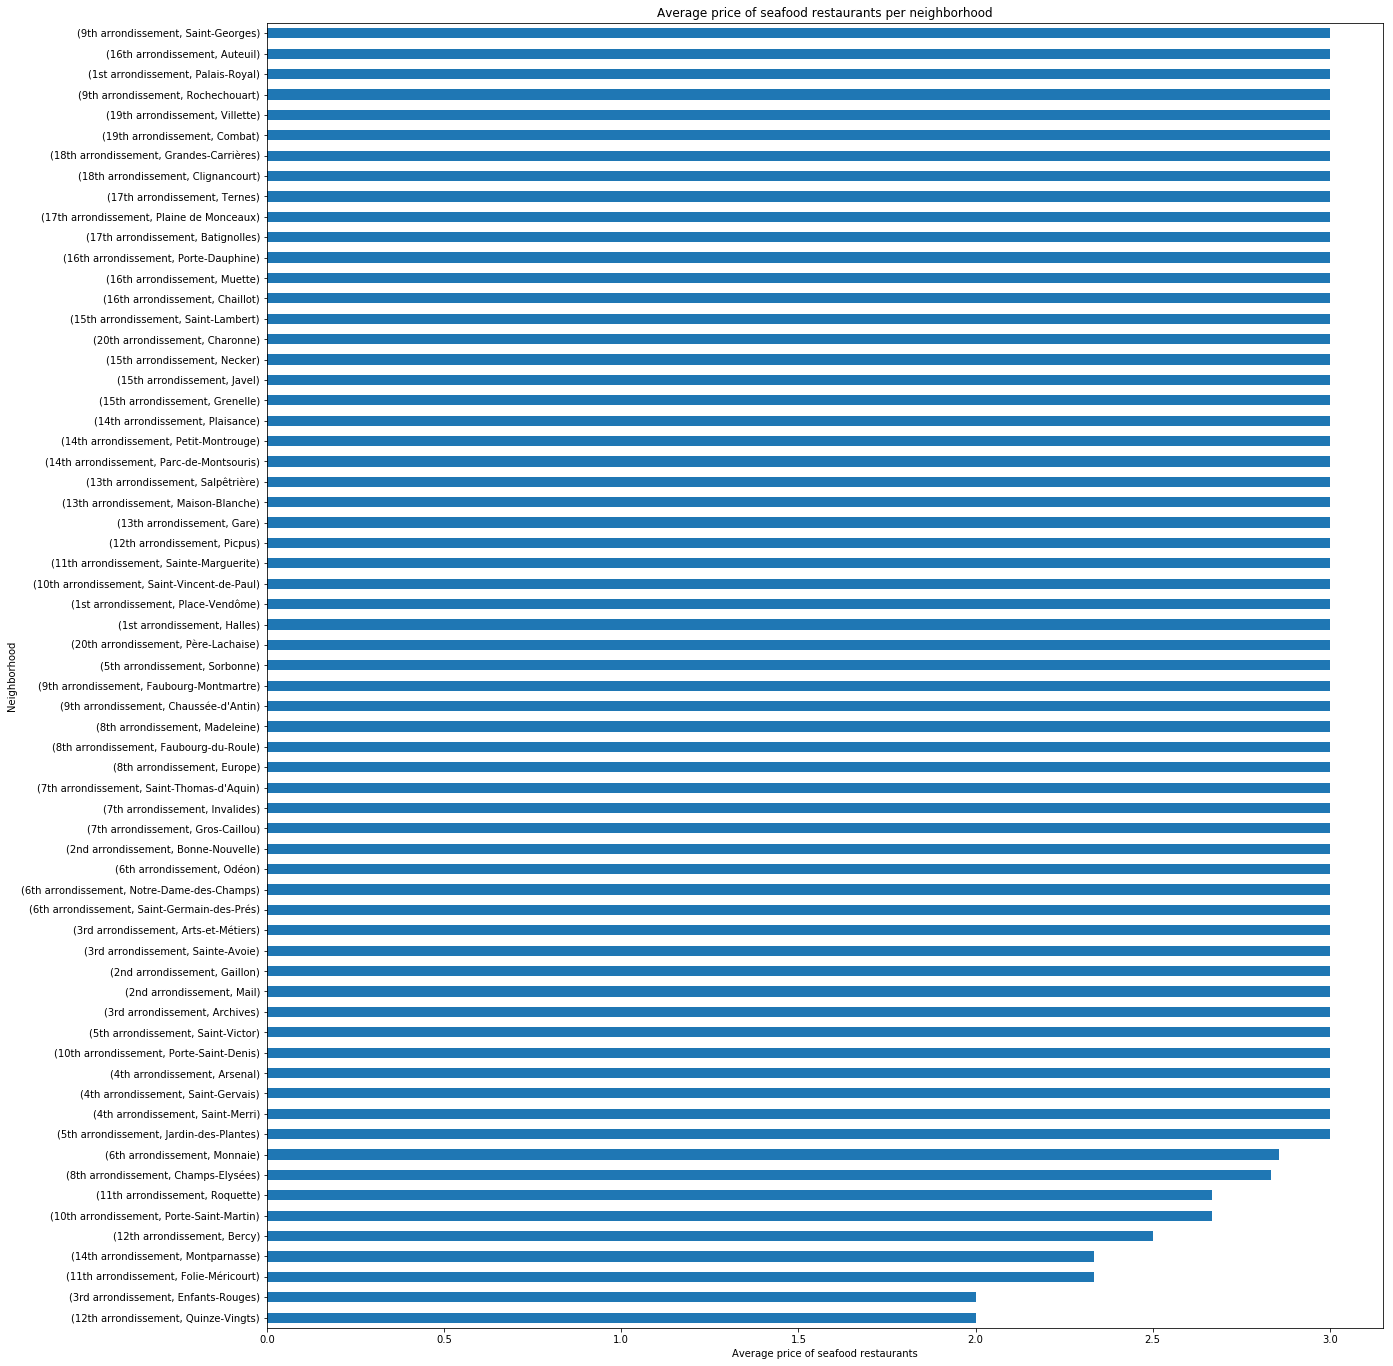

In [132]:
bar_chart_neighborhood_price_df.plot(kind='barh', figsize=(20, 24))

plt.xlabel('Average price of ' + RESTAURANT_CATEGORY + ' restaurants')
plt.ylabel('Neighborhood')
plt.title('Average price of ' + RESTAURANT_CATEGORY + ' restaurants per neighborhood')
plt.legend().remove()

plt.show()

In [133]:
bar_chart_district_df = scatter_plot_neighborhood_df.groupby(['District']).mean()

print('The dataframe shape is {}.'.format(bar_chart_district_df.shape))
print('The dataframe types are:\n{}.'.format(bar_chart_district_df.dtypes))
bar_chart_district_df.head()

The dataframe shape is (20, 2).
The dataframe types are:
Price     float64
Rating    float64
dtype: object.


,Price,Rating
District,,
10th arrondissement,2.833333,7.842857
11th arrondissement,2.625000,7.100000
12th arrondissement,2.500000,8.100000
13th arrondissement,3.000000,NaN
14th arrondissement,2.777778,7.500000


In [134]:
bar_chart_district_rating_df = bar_chart_district_df[['Rating']].copy()
bar_chart_district_rating_df = bar_chart_district_rating_df.sort_values(by=['Rating'], ascending=True)
bar_chart_district_rating_df.dropna(subset=['Rating'], inplace=True)

print('The dataframe shape is {}.'.format(bar_chart_district_rating_df.shape))
print('The dataframe types are:\n{}.'.format(bar_chart_district_rating_df.dtypes))
bar_chart_district_rating_df.head()

The dataframe shape is (18, 1).
The dataframe types are:
Rating    float64
dtype: object.


,Rating
District,
15th arrondissement,6.600000
1st arrondissement,7.000000
11th arrondissement,7.100000
19th arrondissement,7.300000
16th arrondissement,7.371429


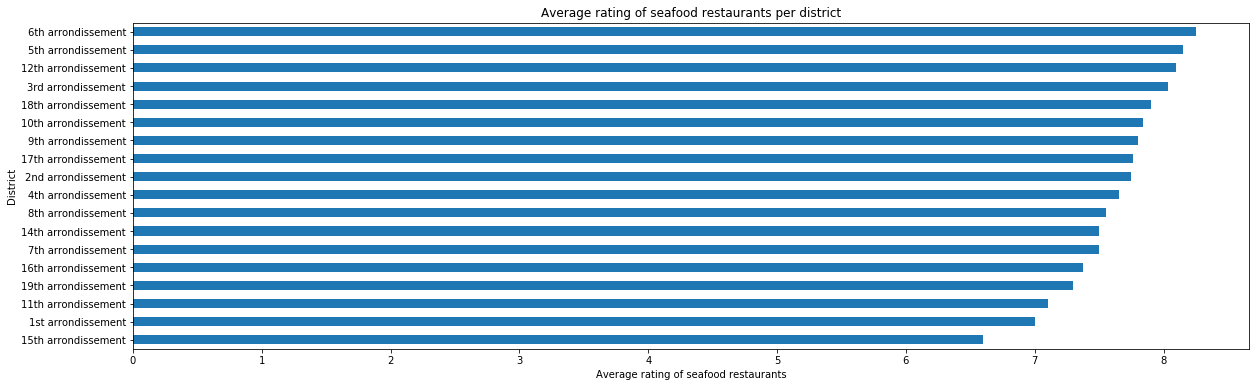

In [135]:
bar_chart_district_rating_df.plot(kind='barh', figsize=(20, 6))

plt.xlabel('Average rating of ' + RESTAURANT_CATEGORY + ' restaurants')
plt.ylabel('District')
plt.title('Average rating of ' + RESTAURANT_CATEGORY + ' restaurants per district')
plt.legend().remove()

plt.show()

In [136]:
bar_chart_district_price_df = bar_chart_district_df[['Price']].copy()
bar_chart_district_price_df = bar_chart_district_price_df.sort_values(by=['Price'], ascending=True)
bar_chart_district_price_df.dropna(subset=['Price'], inplace=True)

print('The dataframe shape is {}.'.format(bar_chart_district_price_df.shape))
print('The dataframe types are:\n{}.'.format(bar_chart_district_price_df.dtypes))
bar_chart_district_price_df.head()

The dataframe shape is (20, 1).
The dataframe types are:
Price    float64
dtype: object.


,Price
District,
12th arrondissement,2.500000
11th arrondissement,2.625000
3rd arrondissement,2.750000
14th arrondissement,2.777778
10th arrondissement,2.833333


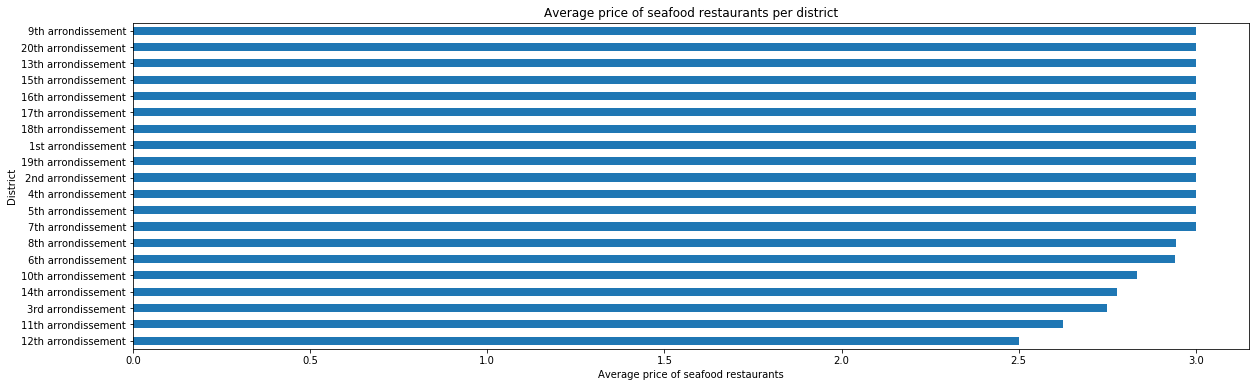

In [144]:
bar_chart_district_price_df.plot(kind='barh', figsize=(20, 6))

plt.xlabel('Average price of ' + RESTAURANT_CATEGORY + ' restaurants')
plt.ylabel('District')
plt.title('Average price of ' + RESTAURANT_CATEGORY + ' restaurants per district')
plt.legend().remove()

plt.show()

## Clustering

DBSCAN

In [146]:
from sklearn.cluster import DBSCAN
print('DBSCAN library imported.')

import sklearn.utils
print('sklearn.utils library imported.')

from sklearn.preprocessing import StandardScaler
print('StandardScaler library imported.')

print('All libraries imported.')

DBSCAN library imported.
sklearn.utils library imported.
StandardScaler library imported.
All libraries imported.


In [157]:
EPSILON = 0.3 #Epsilon determine a specified radius that if includes enough number of points within, we call it dense area  
MINIMUM_SAMPLES = 5 #Minimum samples determine the minimum number of data points we want in a neighborhood to define a cluster.

In [198]:
sklearn.utils.check_random_state(1000)

restaurants_paris_details_dbscan = restaurants_paris_details.copy()

cluster_data_set = restaurants_paris_details_dbscan[['Latitude', 'Longitude', 'Price', 'Rating']]
cluster_data_set = cluster_data_set.fillna(cluster_data_set.mean())
cluster_data_set = StandardScaler().fit_transform(cluster_data_set)

In [199]:
dbscan = DBSCAN(eps=EPSILON, min_samples=MINIMUM_SAMPLES).fit(cluster_data_set)
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_
restaurants_paris_details_dbscan['ClusterDBSCAN'] = labels

In [203]:
restaurants_paris_details_dbscan[['Name', 'Latitude', 'Longitude', 'Price', 'Rating', 'Likes', 'TipsCount', 'IsPrimaryCategory', 'ClusterDBSCAN']].head()

,Name,Latitude,Longitude,Price,Rating,Likes,TipsCount,IsPrimaryCategory,ClusterDBSCAN
0,La Belle de Liron,48.866846,2.347244,3.0,NaN,0,0,True,3
1,Nautilus Food,48.872344,2.342870,3.0,NaN,0,0,True,-1
2,Léon de Bruxelles,48.883684,2.327870,3.0,6.9,46,19,True,-1
3,La Criée,48.870531,2.348942,3.0,7.9,28,9,True,-1
4,Restaurant Le Sichuan,48.870730,2.355052,3.0,NaN,0,0,True,-1


As you can see for outliers, the cluster label is -1